<a href="https://colab.research.google.com/github/harsh-soni/exploratory-ai/blob/main/digits_convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print('hello world')

hello world


In [2]:
from matplotlib import pyplot as plt
from matplotlib import image as img
import numpy as np
import pandas as pd
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


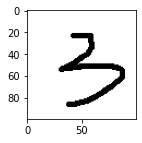

In [16]:
photo = img.imread('./drive/MyDrive/colabdata/number_images/3_2.png')
plt.figure(figsize = (2,2))
plt.imshow(photo)

In [5]:
photo.shape

(100, 100, 4)

In [6]:
def to_gray(photo):
    new_photo=np.zeros(shape=(100,100))
    for i in range(0,len(photo)):
        for j in range(0,len(photo[1])):
            new_photo[i,j] = photo[i,j][1] * 299/1000 + photo[i,j][2] * 587/1000 + photo[i,j][3] * 114/1000
    return new_photo.reshape(100,100,1)

def to_flat(photo):
    new_photo = photo.reshape((10000))
    return new_photo

In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.utils import to_categorical
from keras.layers.reshaping.flatten import Flatten
from keras.layers.convolutional.conv2d_transpose import Conv2D

In [8]:
fileNames = os.listdir('./drive/MyDrive/colabdata/number_images')
digit_labels = [int(item[0]) for item in fileNames]
digit_labels = to_categorical(digit_labels)
# dummies = pd.get_dummies(digit_labels)
# dummies.head()

In [9]:
digit_data = [to_gray(img.imread('./drive/MyDrive/colabdata/number_images/'+file)) for file in fileNames]
digit_data = np.array(digit_data)
digit_data.shape

(40, 100, 100, 1)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(digit_data, digit_labels, test_size=0.2, stratify=digit_labels)

In [21]:
model = Sequential()
model.add(Conv2D(100,(10,10),activation='relu'))
model.add(MaxPooling2D((4,4)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(9,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(X_train,y_train,epochs=30,batch_size=8,verbose=2, validation_data=(X_test,y_test))

Epoch 1/30
4/4 - 2s - loss: 3.0432 - accuracy: 0.1875 - val_loss: 2.1450 - val_accuracy: 0.1250 - 2s/epoch - 379ms/step
Epoch 2/30
4/4 - 1s - loss: 2.1331 - accuracy: 0.2500 - val_loss: 2.1250 - val_accuracy: 0.3750 - 811ms/epoch - 203ms/step
Epoch 3/30
4/4 - 1s - loss: 2.0459 - accuracy: 0.2812 - val_loss: 1.9933 - val_accuracy: 0.5000 - 827ms/epoch - 207ms/step
Epoch 4/30
4/4 - 1s - loss: 1.7856 - accuracy: 0.4688 - val_loss: 1.8253 - val_accuracy: 0.2500 - 840ms/epoch - 210ms/step
Epoch 5/30
4/4 - 1s - loss: 1.5401 - accuracy: 0.5938 - val_loss: 1.6609 - val_accuracy: 0.6250 - 806ms/epoch - 201ms/step
Epoch 6/30
4/4 - 1s - loss: 1.2432 - accuracy: 0.8125 - val_loss: 1.5452 - val_accuracy: 0.5000 - 807ms/epoch - 202ms/step
Epoch 7/30
4/4 - 1s - loss: 0.8809 - accuracy: 0.9375 - val_loss: 1.2899 - val_accuracy: 0.7500 - 802ms/epoch - 201ms/step
Epoch 8/30
4/4 - 1s - loss: 0.5175 - accuracy: 1.0000 - val_loss: 1.1808 - val_accuracy: 0.6250 - 816ms/epoch - 204ms/step
Epoch 9/30
Epoch 10

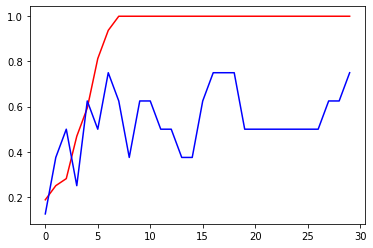

In [28]:
plt.plot(range(0,30),history.history['accuracy'],color='red')
plt.plot(range(0,30),history.history['val_accuracy'],color='blue')

The validation accuracy is unstable. Both the training data and test data is too less for us to create a predictive model that will generalize to unseen data. However, even with randomness built into model fitting as well as data split, a validation accuracy of 65% is constantly seen between 15-25 epochs. Since the accuracy reaches 100% much early, model is certainly overfitting. 

1/1 [==============================] - 0s 135ms/step


4

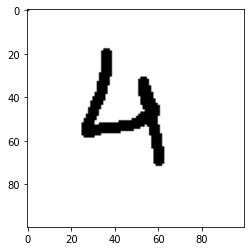

In [14]:
chk = 0
plt.imshow(X_test[chk].reshape(100,100), cmap='gray')
np.argmax(model.predict(X_test[chk:chk+1]))

In [15]:
model.evaluate(X_train, y_train, verbose=2)

1/1 - 0s - loss: 5.6755e-04 - accuracy: 1.0000 - 358ms/epoch - 358ms/step


[0.0005675494903698564, 1.0]